In [1]:
#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [33]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5

In [3]:
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 'dataset',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)

Found 5589 files belonging to 3 classes.


In [4]:
class_names=images_dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy']

In [5]:
len(images_dataset)

175

In [6]:
#exploring the dataset
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 2 1 2 2 0 1 1 0 1 1 0 0 0 1 1 2 0 2 2 0 1 0 2 0 2 0 0 1 0 1 1]


In [15]:
#print first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())


[[[ 97.  96.  91.]
  [ 97.  96.  91.]
  [ 98.  97.  92.]
  ...
  [ 76.  76.  78.]
  [ 79.  79.  81.]
  [ 82.  82.  84.]]

 [[ 97.  96.  91.]
  [ 97.  96.  91.]
  [ 97.  96.  91.]
  ...
  [ 79.  79.  81.]
  [ 80.  80.  82.]
  [ 82.  82.  84.]]

 [[ 97.  96.  91.]
  [ 97.  96.  91.]
  [ 97.  96.  91.]
  ...
  [ 81.  81.  83.]
  [ 80.  80.  82.]
  [ 80.  80.  82.]]

 ...

 [[150. 155. 148.]
  [150. 155. 148.]
  [149. 154. 147.]
  ...
  [125. 129. 128.]
  [116. 120. 119.]
  [112. 116. 115.]]

 [[150. 155. 148.]
  [150. 155. 148.]
  [149. 154. 147.]
  ...
  [139. 143. 142.]
  [133. 137. 136.]
  [131. 135. 134.]]

 [[150. 155. 148.]
  [150. 155. 148.]
  [149. 154. 147.]
  ...
  [139. 143. 142.]
  [139. 143. 142.]
  [140. 144. 143.]]]


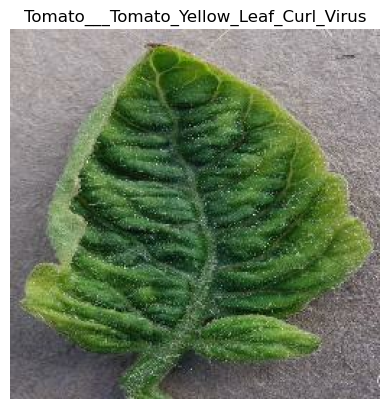

In [7]:
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')


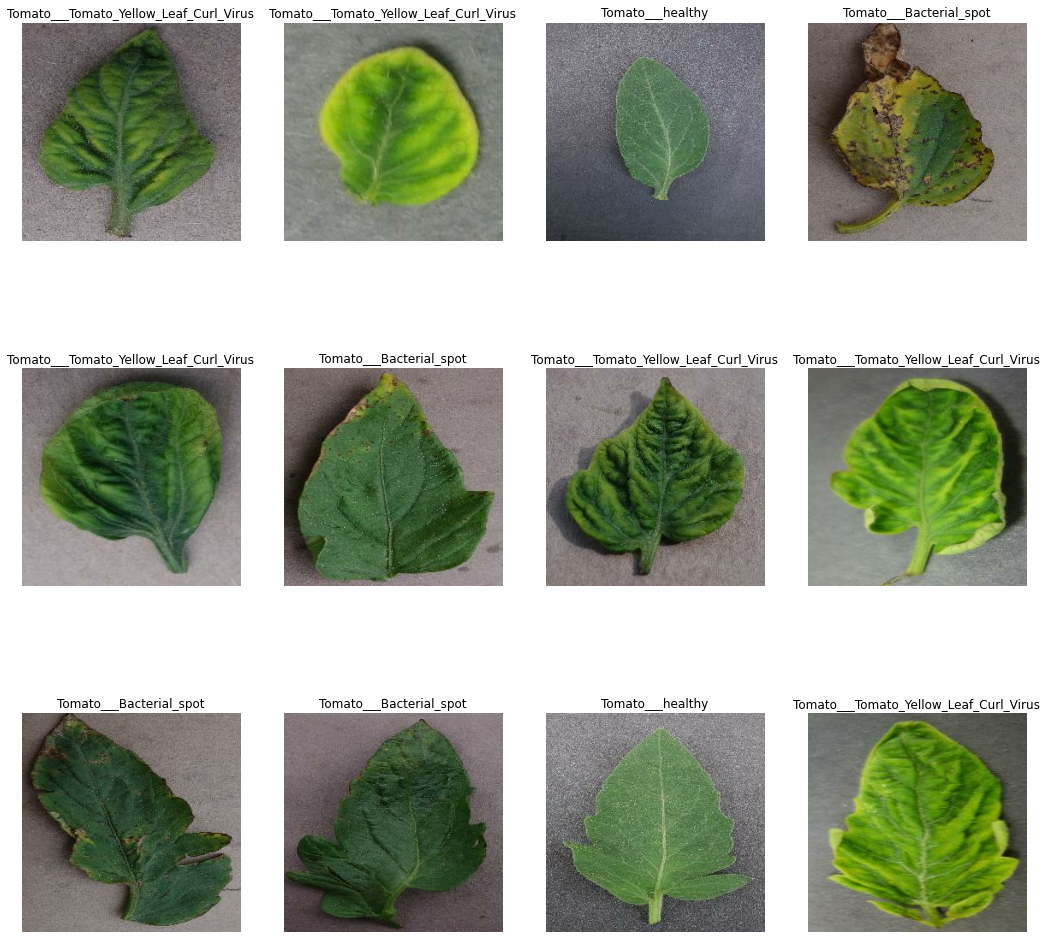

In [28]:
#visualize the first image in that batch
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [8]:
len(images_dataset)

175

In [9]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size= int(train_split* ds_size)
    val_size=int(val_split* ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)

In [11]:
print(len(train_ds),len(val_ds),len(test_ds))


140 17 18


In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [17]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 256

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])


In [16]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [26]:
#building model
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [27]:
#summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
#train the network with the given inputs and corresponding labels
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 131s 932ms/step - accuracy: 0.9575 - loss: 0.1246 - val_accuracy: 0.9412 - val_loss: 0.1964
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 131s 935ms/step - accuracy: 0.9496 - loss: 0.1249 - val_accuracy: 0.9743 - val_loss: 0.0756
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 131s 937ms/step - accuracy: 0.9702 - loss: 0.0874 - val_accuracy: 0.9669 - val_loss: 0.0967
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 133s 947ms/step - accuracy: 0.9713 - loss: 0.0838 - val_accuracy: 0.9688 - val_loss: 0.0793
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 133s 949ms/step - accuracy: 0.9768 - loss: 0.0727 - val_accuracy: 0.9632 - val_loss: 0.0729


In [35]:
# evaluate the model
scores=model.evaluate(test_ds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.9662 - loss: 0.0594


In [36]:
scores

[0.07801292836666107, 0.9663716554641724]

In [37]:
history

#import librabries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
IMAGE_SIZE=256
BATCH_SIZE=32
images_dataset=tf.keras.preprocessing.image_dataset_from_directory(
 'dataset',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)
class_names=images_dataset.class_names
class_names
len(images_dataset)
#exploring the dataset
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
#visualize the first image in that batch
for image_batch, label_batch in images_dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')
len(images_dataset)
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size= int(trai

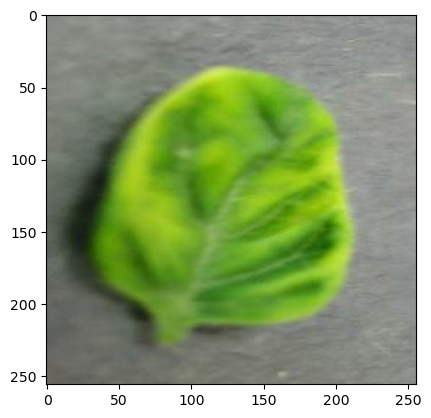

In [45]:
for images_batch,label_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

predicting the first image
image1 true label : Tomato___Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
image1 predicted label :  Tomato___Tomato_Yellow_Leaf_Curl_Virus


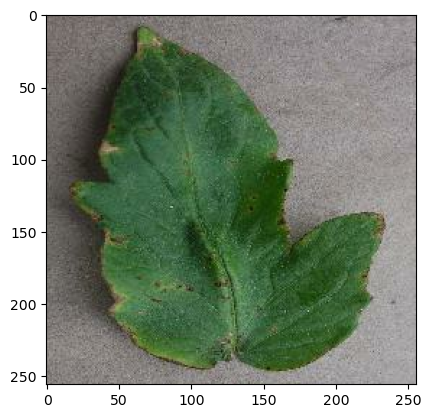

In [46]:
# making predictions
for images_batch,label_batch in test_ds.take(1):
    image1=images_batch[0].numpy().astype('uint8')
    label1=label_batch[0].numpy()
    
    print("predicting the first image")
    plt.imshow(image1)
    print("image1 true label :" , class_names[label1])
    
    batch_prediction=model.predict(images_batch)
    print("image1 predicted label : " ,class_names[np.argmax(batch_prediction[0])])
    


In [47]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


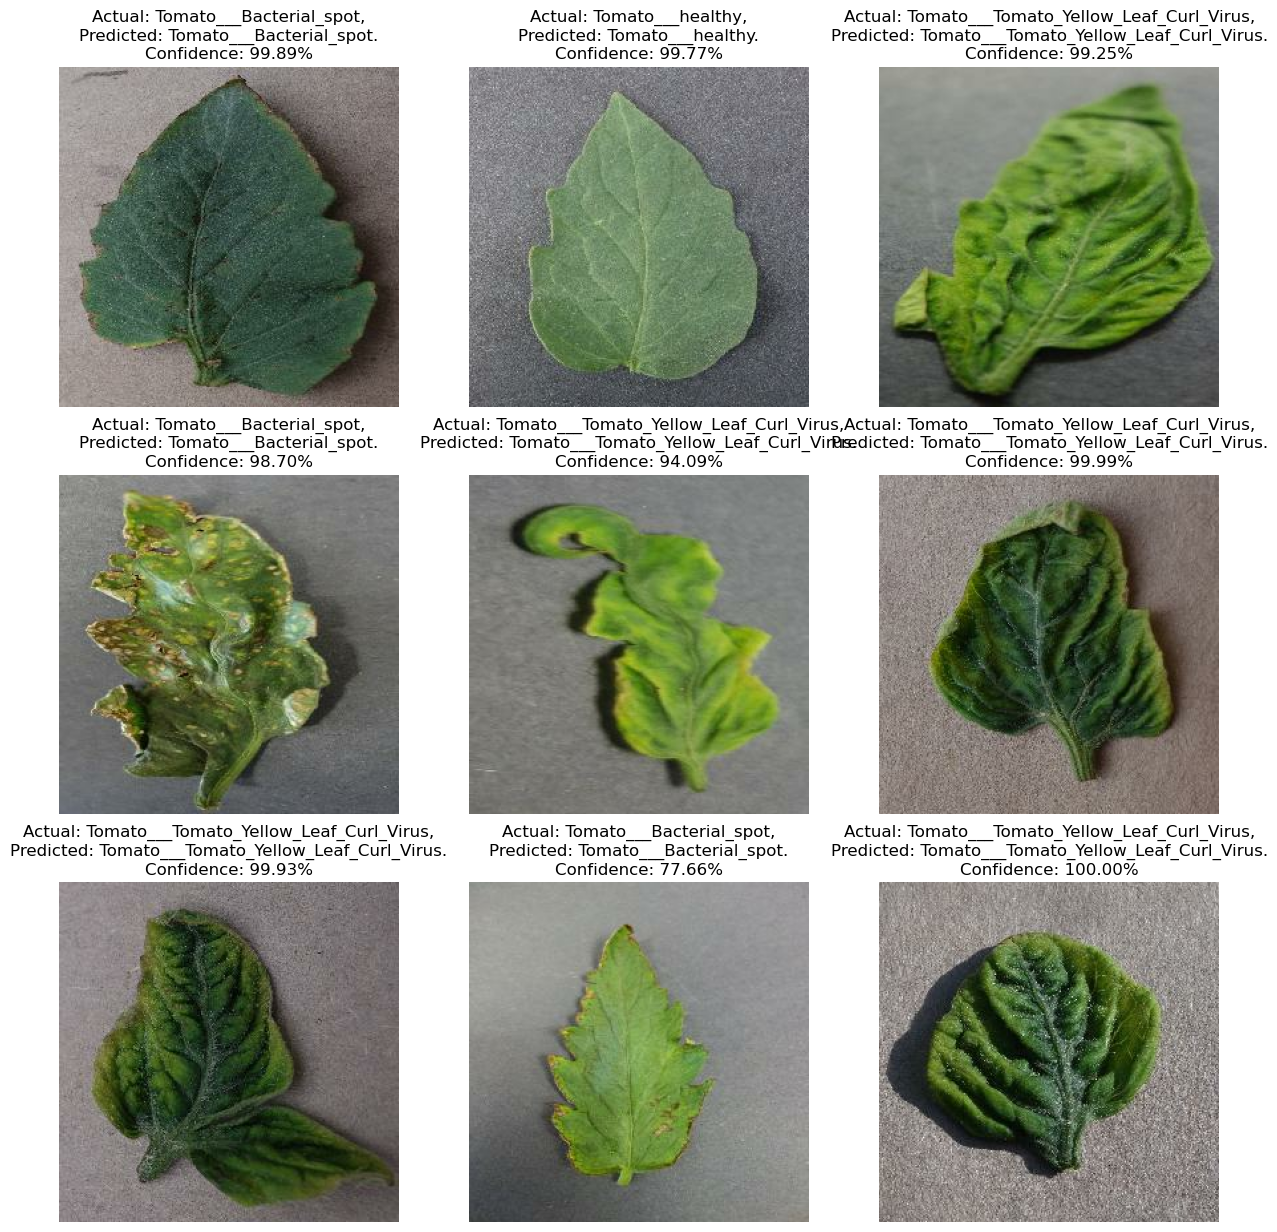

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], axis=0))
        predicted_class = class_names[int(tf.argmax(predictions, axis=1))]
        actual_class = class_names[int(labels[i])]
        confidence = tf.reduce_max(predictions) * 100
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence:.2f}%")
        plt.axis("off")
plt.show()
